In [2]:
# fire_hazard_model.py
# 1. Import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 2. Load the dataset
df = pd.read_csv("fire_hazard.csv")

In [4]:
# 3. Display initial info
print("Initial Dataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  10000 non-null  float64
 1   Humidity     10000 non-null  float64
 2   Gas_Value    10000 non-null  float64
 3   Fire_Hazard  10000 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 312.6 KB
None

Missing Values:
 Temperature    0
Humidity       0
Gas_Value      0
Fire_Hazard    0
dtype: int64


In [5]:
# 4. Handle missing values
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype in [np.float64, np.int64, float, int]:
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)


In [6]:
# 5. Split data into features and target

# Print the columns of the DataFrame to verify the column names
print("Columns in DataFrame:", df.columns)

# Split data into features and target
# Change "Fire_Detected" to the actual column name, likely "Fire_Hazard" based on the error and global variables
X = df.drop("Fire_Hazard", axis=1)
y = df["Fire_Hazard"]

Columns in DataFrame: Index(['Temperature', 'Humidity', 'Gas_Value', 'Fire_Hazard'], dtype='object')


In [7]:
#6. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 7. Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
# 8. Predict and evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9670

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       975
           1       0.97      0.97      0.97      1025

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



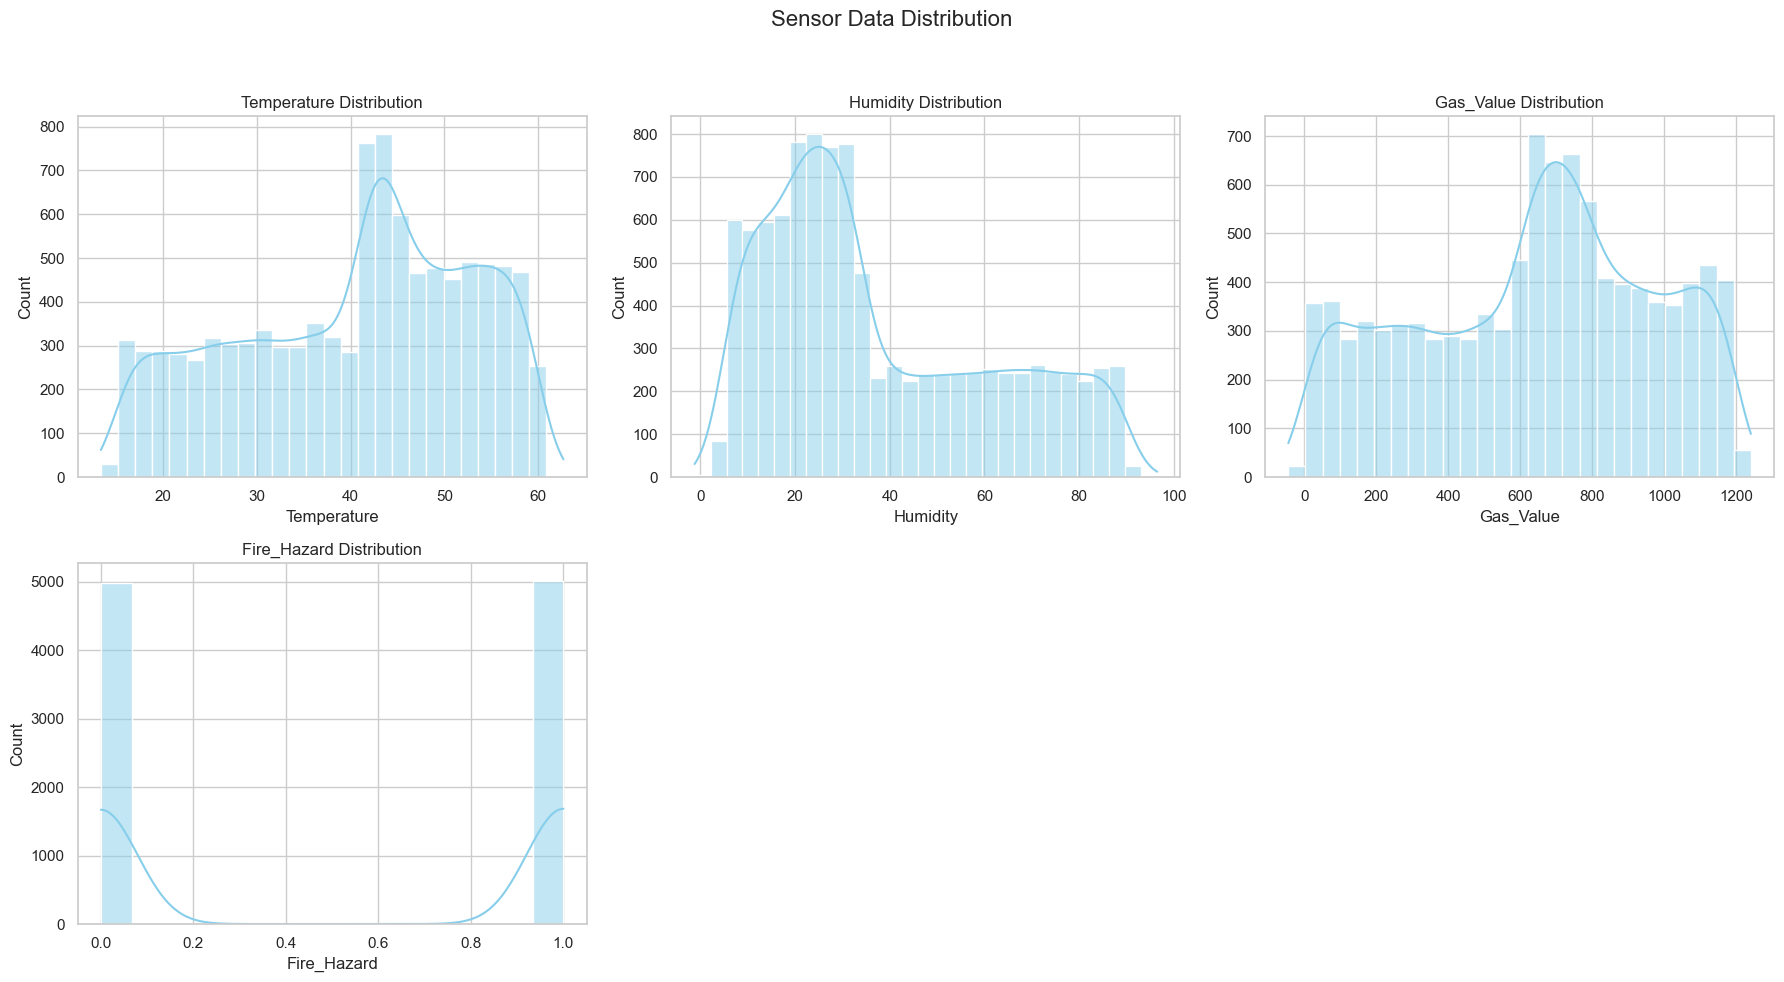

In [10]:
sns.set(style="whitegrid")

# Define the columns that are actually present in your dataset
# Changed "Fire_Detected" to "Fire_Hazard" to match the target column used earlier
columns = ["Temperature", "Humidity", "Gas_Value", "Fire_Hazard"]

# Create subplots dynamically based on the number of columns
num_cols = len(columns)
num_rows = (num_cols + 2) // 3 # This will ensure enough rows for 3 columns per row
fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 5))
fig.suptitle("Sensor Data Distribution", fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"{col} Distribution")

# Hide any unused subplots
for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [11]:
# 10. Optional: Save the trained model for IoT use
import joblib
joblib.dump(rf_model, "fire_hazard_model.pkl")
print("\nTrained model saved as 'fire_hazard_model.pkl'")


Trained model saved as 'fire_hazard_model.pkl'


In [12]:
import pandas as pd
def handle_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            # For object columns, fill with mode
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            # For numeric columns, fill with mean
            df[column] = df[column].fillna(df[column].mean())
    return df

# Load your dataset
df = pd.read_csv('fire_hazard.csv')

# Apply the function to handle missing values
df = handle_missing_values(df)

# Display information about the DataFrame after handling missing values
print("DataFrame Info after handling missing values:")
print(df.info())

# Display the first few rows to confirm changes
print("\nDataFrame head after handling missing values:")
print(df.head())


DataFrame Info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  10000 non-null  float64
 1   Humidity     10000 non-null  float64
 2   Gas_Value    10000 non-null  float64
 3   Fire_Hazard  10000 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 312.6 KB
None

DataFrame head after handling missing values:
   Temperature  Humidity  Gas_Value  Fire_Hazard
0        31.18     30.19     507.80            0
1        54.18     19.60     911.07            1
2        24.34     57.62     556.44            0
3        54.32     24.81     737.09            1
4        22.54     20.68     543.98            0


In [ ]:
# --- INTERACTIVE INTERFACE SIMULATION ---
import pandas as pd # Add the import statement here
input_data = {
    "Temperature": 45.0,
    "Humidity": 60.0,
    "Gas_Value": 250.0
}

# Create a DataFrame from the input data
input_df = pd.DataFrame([input_data])


--- Model Training and Evaluation ---
Model Accuracy on Test Set: 0.97

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       975
           1       0.97      0.97      0.97      1025

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000


--- Prediction Result for Example Input ---
⚠️ FIRE HAZARD DETECTED! Risk Probability: 63.00%


C:\Users\shrav\AppData\Local\Temp\ipykernel_20908\4229749464.py:153: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\shrav\AppData\Local\Temp\ipykernel_20908\4229749464.py:153: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\shrav\AppData\Local\Temp\ipykernel_20908\4229749464.py:153: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\shrav\AppData\Local\Temp\ipykernel_20908\4229749464.py:153: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
c:\Users\shrav\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\shrav\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELE

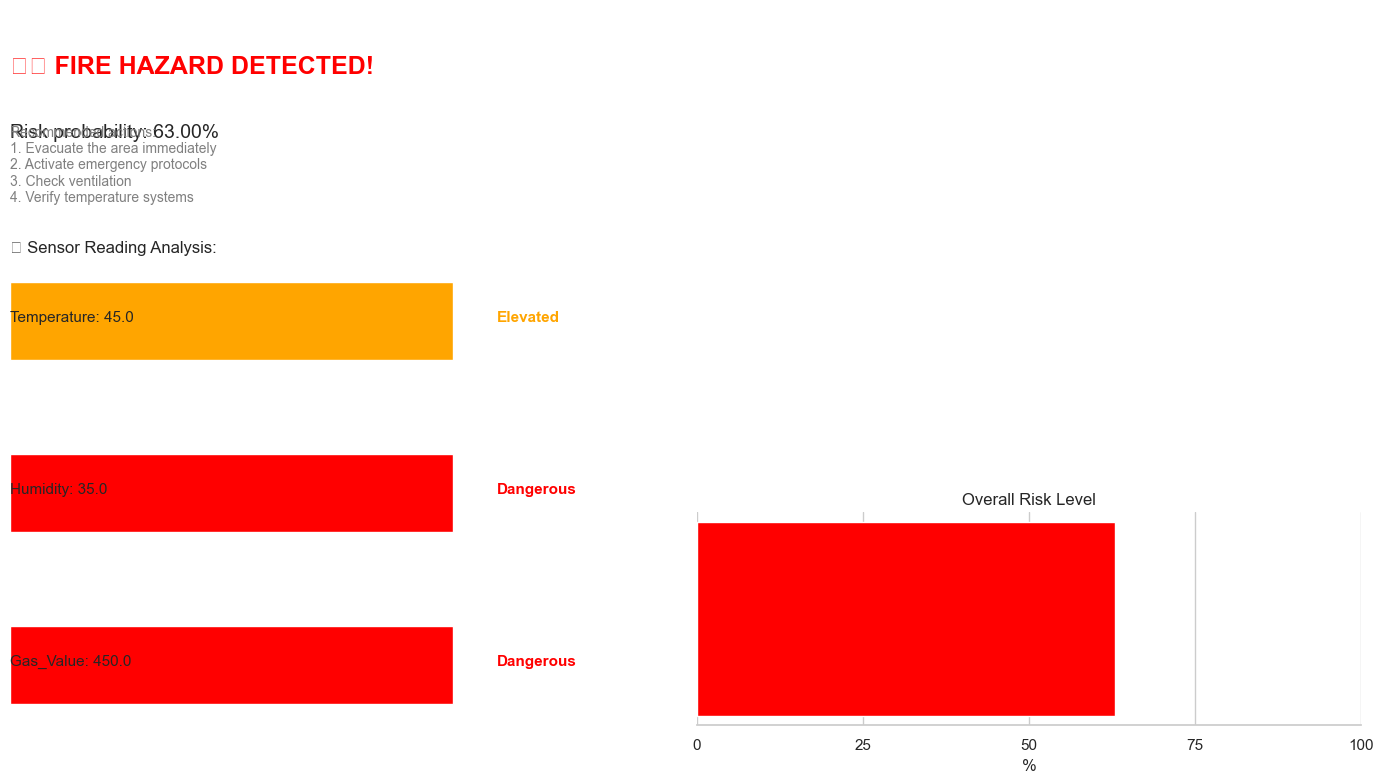

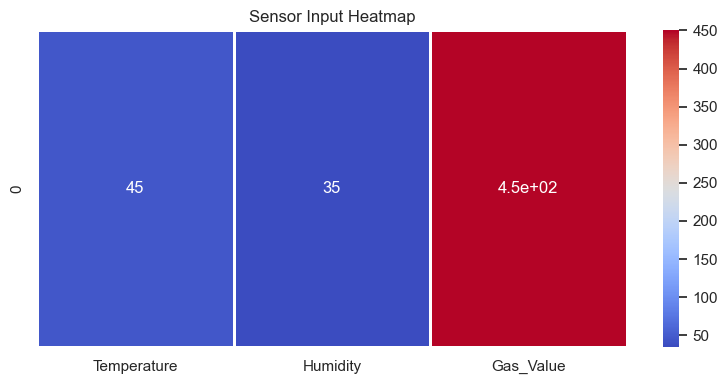

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# --- 1. Load and Prepare Data ---
# Load the dataset
try:
    df = pd.read_csv('fire_hazard.csv')
except FileNotFoundError:
    print("Error: 'fire_hazard_dataset.csv' not found. Please ensure the file is in the same directory.")
    exit()

# Define features and target based on your dataset's actual columns
# Changed 'Fire_Detected' to 'Fire_Hazard' to match the column name in the dataset
features = ['Temperature', 'Humidity', 'Gas_Value']
target = 'Fire_Hazard' # Correct target column name

# Verify that the necessary columns exist in the DataFrame
if not all(col in df.columns for col in features + [target]):
    missing_cols = [col for col in features + [target] if col not in df.columns]
    print(f"Error: Missing columns in the dataset: {missing_cols}")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

X = df[features]
y = df[target]

# --- 2. Train a Machine Learning Model ---
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# (Optional) Print model evaluation metrics
print("--- Model Training and Evaluation ---")
y_pred_test = rf_model.predict(X_test)
print(f"Model Accuracy on Test Set: {accuracy_score(y_test, y_pred_test):.2f}")
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))


# --- 3. Interactive Interface Simulation - User Input & Prediction ---

# Example test input (simulating IoT sensor values) as provided by the user
# This will be used for prediction and plotting in this execution
input_data_for_prediction = {
    "Temperature": 45.0,
    "Humidity": 35.0,
    "Gas_Value": 450.0
}

input_df_for_prediction = pd.DataFrame([input_data_for_prediction])

# Predict with the trained model
predicted_class = rf_model.predict(input_df_for_prediction)[0]
# Get probability of the positive class (Fire_Detected = 1)
if len(rf_model.classes_) > 1:
    # Find the index of the positive class (assuming 1 is the positive class)
    if 1 in rf_model.classes_:
        positive_class_index = list(rf_model.classes_).index(1)
        risk_probability = rf_model.predict_proba(input_df_for_prediction)[0][positive_class_index] * 100
    else:
        # If 1 is not in classes, the model only predicts 0.
        risk_probability = 0.0
else:
    # If model predicts only one class, risk_probability is 0 or 100
    risk_probability = 100.0 if predicted_class == 1 else 0.0


# --- 4. Define Thresholds and Status Function for Plotting ---

# Updated thresholds based on dataset columns and example ranges
thresholds = {
    "Temperature": [40, 50],
    "Humidity": [40, 50],
    "Gas_Value": [300, 400]
}

# Function to get status based on thresholds
def get_status(val, limits, is_humidity=False):
    if is_humidity:
        if val > limits[1]:
            return "Normal", "green"
        elif val > limits[0]:
            return "Elevated", "orange"
        else:
            return "Dangerous", "red"
    else:
        if val < limits[0]:
            return "Normal", "green"
        elif val < limits[1]:
            return "Elevated", "orange"
        else:
            return "Dangerous", "red"

# --- 5. Display Prediction Result (Text) ---
print("\n--- Prediction Result for Example Input ---")
if predicted_class == 1:
    print(f"⚠️ FIRE HAZARD DETECTED! Risk Probability: {risk_probability:.2f}%")
else:
    print(f"✅ SAFE CONDITION. Risk Probability: {risk_probability:.2f}%")

# --- 6. Plot the Interactive Interface ---
sns.set(style="whitegrid")

fig = plt.figure(constrained_layout=True, figsize=(14, 8))
gs = GridSpec(3, 2, figure=fig)

# Fire hazard warning section (ax0)
ax0 = fig.add_subplot(gs[0, :])
ax0.axis('off')
color_box = "#ffe5e5" if predicted_class == 1 else "#e5ffe5"
ax0.set_facecolor(color_box)
alert_text = "⚠️ FIRE HAZARD DETECTED!" if predicted_class == 1 else "✅ SAFE CONDITION"
risk_text = f"Risk probability: {risk_probability:.2f}%"
ax0.text(0, 0.7, alert_text, fontsize=18, color="red" if predicted_class == 1 else "green", weight="bold")
ax0.text(0, 0.4, risk_text, fontsize=14)
if predicted_class == 1:
    ax0.text(0, 0.1, "Recommended actions:\n1. Evacuate the area immediately\n2. Activate emergency protocols\n3. Check ventilation\n4. Verify temperature systems", fontsize=10, color="gray")

# Sensor analysis section (ax1)
ax1 = fig.add_subplot(gs[1:, 0])
ax1.axis('off')
ax1.set_title("📊 Sensor Reading Analysis:", fontsize=12, loc='left')

# Use the input_data_for_prediction for plotting sensor values
num_sensors = len(input_data_for_prediction)
for i, (sensor, value) in enumerate(input_data_for_prediction.items()):
    is_humidity_sensor = (sensor == "Humidity")
    status, color = get_status(value, thresholds[sensor], is_humidity=is_humidity_sensor)
    vertical_position = 1 - i * 0.22
    ax1.text(0, vertical_position, f"{sensor}: {value}", fontsize=11)
    ax1.barh(vertical_position, 1, height=0.1, color=color)
    ax1.text(1.1, vertical_position, status, fontsize=11, color=color, weight="bold")
ax1.set_xlim(0, 1.5)

# Overall Risk Level bar (ax2)
ax2 = fig.add_subplot(gs[2, 1])
ax2.set_title("Overall Risk Level", fontsize=12)
ax2.barh(0, risk_probability, color="red" if predicted_class else "green")
ax2.set_xlim(0, 100)
ax2.set_xticks([0, 25, 50, 75, 100])
ax2.set_yticks([])
ax2.set_xlabel("%")
ax2.spines[['top', 'right', 'left']].set_visible(False)

plt.tight_layout()
plt.show()

# --- 7. Heatmap of Sensor Values ---
# Use input_data_for_prediction for the heatmap
heatmap_data = pd.DataFrame([input_data_for_prediction])
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True, linewidths=1)
plt.title("Sensor Input Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# --- 1. Load and Prepare Data ---
# Load the dataset
try:
    df = pd.read_csv('fire_hazard.csv')
except FileNotFoundError:
    print("fire_hazard_dataset.csv not found. Please ensure the file is in the correct directory.")
    exit()

# Define features and target based on your dataset
features = ['Temperature', 'Humidity', 'Gas_Value']
# Correct the target column name from 'Fire_Detected' to 'Fire_Hazard'
target = 'Fire_Hazard'

# Check if required columns exist
if not all(col in df.columns for col in features + [target]):
    print(f"Error: One or more required columns ({features + [target]}) not not found in the dataset.")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

X = df[features]
y = df[target]

# --- 2. Train a Machine Learning Model (RandomForestClassifier as implied) ---
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model (optional, but good practice)
y_pred = rf_model.predict(X_test)
print(f"Model Accuracy on Test Set: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


# --- 3. Interactive Interface Simulation with User Inputs ---

# Ask user for inputs based on the actual dataset columns
print("\nEnter sensor values to predict fire hazard risk:")
temp = float(input("Temperature (°C): "))
hum = float(input("Humidity (%): "))
gas_val = float(input("Gas_Value: ")) # Corrected input for Gas_Value

# Create input_data with the correct feature order and names
input_data = {
    "Temperature": temp,
    "Humidity": hum,
    "Gas_Value": gas_val
}

input_df = pd.DataFrame([input_data])

# Predict with the trained model
predicted_class = rf_model.predict(input_df)[0]
# Get probability of the positive class (Fire_Hazard = 1, assuming 1 is the positive class)
# Check if the model was trained on multiple classes before accessing index 1
if len(rf_model.classes_) > 1:
    # Find the index of the positive class (assuming 1 is the positive class)
    if 1 in rf_model.classes_:
        positive_class_index = list(rf_model.classes_).index(1)
        risk_probability = rf_model.predict_proba(input_df)[0][positive_class_index] * 100
    else:
        # If 1 is not in classes, the model only predicts 0.
        risk_probability = 0.0
else:
    # If model predicts only one class, risk_probability is 0 or 100
    risk_probability = 100.0 if predicted_class == 1 else 0.0


# Display prediction result
print("\nPrediction Result:")
if predicted_class == 1:
    print(f"⚠️ FIRE HAZARD DETECTED! Risk Probability: {risk_probability:.2f}%")
else:
    print(f"✅ SAFE CONDITION. Risk Probability: {risk_probability:.2f}%")

# --- 4. Heatmap of Sensor Values ---
# Create heatmap_data with the actual input_data
heatmap_data = pd.DataFrame([input_data])
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True, linewidths=1)
plt.title("Sensor Input Heatmap")
plt.tight_layout()
plt.show()

Model Accuracy on Test Set: 0.97

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       975
           1       0.97      0.97      0.97      1025

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000


Enter sensor values to predict fire hazard risk:
